# Previsão de Clientes Churn

## Objetivo do projeto: 
### Identificar clientes propensos a se tornar churn (a deixarem de ser clientes) com base numa série de categorias que serão utilizadas nessa classificação

## Desafio
### Desafio atual do projeto, além da previsão, é decidir qual algoritmo de classificação melhor soluciona a problemática

In [1]:
# Importando os dados
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'
dados = pd.read_csv(url)
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [2]:
dados.shape

(7043, 18)

In [3]:
# Tratamento dos dados
colunas_categoricas = ['Conjuge',
                                           'Dependentes',
                                           'TelefoneFixo',
                                           'VariasLinhasTelefonicas',
                                           'ServicoDeInternet',
                                           'SegurancaOnline',
                                           'BackupOnline',
                                           'SeguroNoDispositivo',
                                           'SuporteTecnico',
                                           'TVaCabo',
                                           'StreamingDeFilmes',
                                           'TipoDeContrato',
                                           'PagamentoOnline',
                                           'FormaDePagamento',
                                           'Churn' 
                                          ]

dados_aux = dados.drop(columns = colunas_categoricas)
dados_transformar = dados[colunas_categoricas]

In [4]:
# Transformando as variáveis não numéricas em numéricas para que esteja no formato aceito pelos modelos
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
encoder = OrdinalEncoder()

dados_transformados = encoder.fit_transform(dados_transformar)
dados_transformados = pd.DataFrame(dados_transformados)

In [5]:
#Finalizando o encoding da celula anterior
nomes = {
    0: 'Conjuge' , 1: 'Dependentes', 2:  'TelefoneFixo' , 
    3: 'VariasLinhasTelefonicas' , 4 :  'ServicoDeInternet',
    5:  'SegurancaOnline', 6:'BackupOnline' , 7: 'SeguroNoDispositivo', 
    8: 'SuporteTecnico', 9: 'TVaCabo', 10:'StreamingDeFilmes',
    11:  'TipoDeContrato', 12:'PagamentoOnline', 13: 'FormaDePagamento', 14:'Churn'
}
dados_transformados.rename(columns = nomes, inplace = True)
dados = pd.concat([dados_aux, dados_transformados], axis = 1)

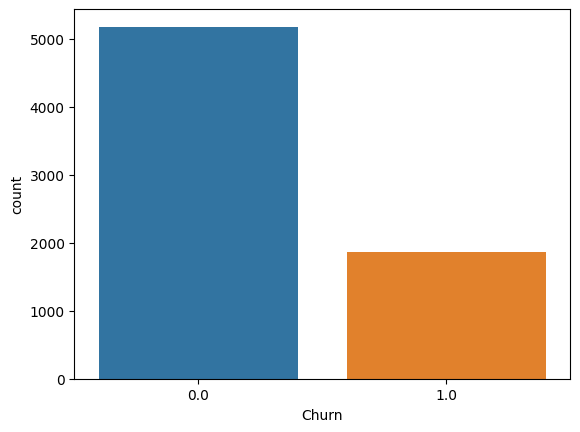

In [6]:
#Verificando distribuição das variáveis de classificação
# Existem mais valores 0 (nao churn) que 1 (churn)
# Esta diferença de quantidade de amostras pode impactar a performance do modelo
import seaborn as sns
ax = sns.countplot(x='Churn', data=dados)

In [7]:
#Vefificando de maneira percentual a diferença vista na celula anterior
diferenca = pd.DataFrame(dados.value_counts('Churn', normalize = True) * 100)
diferenca.rename(columns = {0: "Percentual %"}, inplace = True)
diferenca

,Percentual %
Churn,
0.0,73.463013
1.0,26.536987


In [8]:
# Utilizando método de oversampling, que irá equilibrar a distribuição da variável churn
# O smote basicamente cria novas amostras com valores intermediarios aos das ja existentes
# para equilibrar a distribuição sem causar muitas alteraçãoes nas estatísticas do dataset
# como os valores das categorias estao como numericos, essa transformação será possivel.

x = dados.drop(columns = 'Churn')
y = dados['Churn']

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=5)
x, y = smt.fit_resample(x, y)


In [9]:
dados = pd.concat([x, y], axis = 1)
dados.head()

,Maior65Anos,MesesDeContrato,ContaMensal,Conjuge,Dependentes,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,Churn
0,0,1,29.85,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0,34,56.95,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
2,0,2,53.85,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0,45,42.30,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0
4,0,2,70.70,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


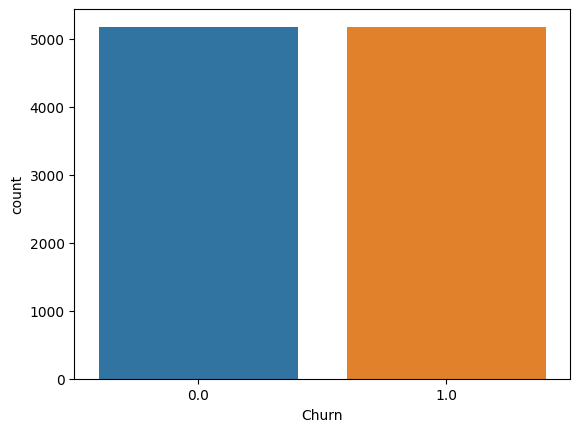

In [10]:
ax = sns.countplot(x='Churn', data=dados)


In [11]:
diferenca = pd.DataFrame(dados.value_counts('Churn', normalize = True) * 100)
diferenca.rename(columns = {0: "Percentual %"}, inplace = True)
diferenca

,Percentual %
Churn,
0.0,50.0
1.0,50.0


In [12]:
# Pre processamento
raw_x = dados.drop( columns = 'Churn')
y = dados['Churn']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

SEED = 5
np.random.seed(SEED)
#deixando os dados na mesma escala, pois o knn é sensível a valores muito diferentes
scaler = StandardScaler()
x = scaler.fit_transform(raw_x)
#dividindo treino e teste, sendo 75% dos dados para treino e 25% para teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify = y)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=3)
# K padrao eh igual a 5
knn.fit(x_treino, y_treino)
previsao = knn.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao) * 100
print("acuracia de %.2f%%" %acuracia)

acuracia de 79.20%


C:\Users\cat13\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [14]:
# Comparando com baseline / Dummy Classifiers

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_treino, y_treino)
previsao_dummy = dummy_clf.predict(x_teste)
accuracy_score(y_teste, previsao_dummy) * 100


49.98067259373792

# Fazendo previsoes utilizando modelo bayesiano

In [15]:
from sklearn.naive_bayes import BernoulliNB
#modelo bayesiano utiliza apenas variaveis binarias, entao é preciso binarizar algumas variaveis
parametro_binario = np.median(x_treino)
bnb = BernoulliNB(binarize = parametro_binario)

In [16]:
bnb.fit(x_treino, y_treino)
predict_nb = bnb.predict(x_teste)
acuracia = accuracy_score(y_teste, predict_nb) * 100
print("acuracia de %.2f%%" %acuracia)

acuracia de 73.83%


# Fazendo previsoes utilizando árvore de descisoa


In [17]:

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dtc.fit(x_treino, y_treino)


DecisionTreeClassifier(random_state=42)

In [18]:
dtc.feature_importances_

array([0.01212671, 0.14354047, 0.20945361, 0.01933937, 0.01979863,
       0.00411753, 0.0168174 , 0.0077952 , 0.18540368, 0.01616404,
       0.01616192, 0.06967211, 0.0111978 , 0.01452922, 0.14263379,
       0.02796176, 0.08328676])

In [19]:
predict_dtc = dtc.predict(x_teste)
acuracia = accuracy_score(y_teste, predict_dtc) * 100
print("acuracia de %.2f%%" %acuracia)

acuracia de 80.40%


# Validação dos modelos 

In [20]:
# Matriz de Confusão

from sklearn.metrics import confusion_matrix
previsoes = {'knn' : previsao, 'Naive Bayes' : predict_nb, 'Decision Tree' : predict_dtc}

for algoritmo in list(previsoes.keys()):
    print('Matriz de Confunsão %s' %algoritmo)
    print(confusion_matrix(y_teste, previsoes[algoritmo]))

# Árvoce de decisão obteve melhor desempenho

Matriz de Confunsão knn
[[ 913  380]
 [ 158 1136]]
Matriz de Confunsão Naive Bayes
[[935 358]
 [319 975]]
Matriz de Confunsão Decision Tree
[[1028  265]
 [ 242 1052]]


In [21]:
#Acurácia - Analisa desempenho geral 
for algoritmo in list(previsoes.keys()):
    print('Modelo %s' %algoritmo)
    acuracia = accuracy_score(y_teste, previsoes[algoritmo]) * 100
    print("acuracia de %.2f%%" %acuracia)

Modelo knn
acuracia de 79.20%
Modelo Naive Bayes
acuracia de 73.83%
Modelo Decision Tree
acuracia de 80.40%


In [22]:
#Precisao - Analisa acertos de positivos
from sklearn.metrics import precision_score

for algoritmo in list(previsoes.keys()):
    print('Score de Precisao de %s' %algoritmo)
    print(precision_score(y_teste, previsoes[algoritmo]) * 100)

Score de Precisao de knn
74.93403693931398
Score de Precisao de Naive Bayes
73.14328582145536
Score de Precisao de Decision Tree
79.87851176917236


In [23]:
#Recall - Analisa acerto de verdadeiros positivos 

from sklearn.metrics import recall_score

for algoritmo in list(previsoes.keys()):
    print('Score de Recall %s' %algoritmo)
    print(recall_score(y_teste, previsoes[algoritmo]) * 100)


Score de Recall knn
87.78979907264298
Score de Recall Naive Bayes
75.34775888717155
Score de Recall Decision Tree
81.2982998454405


In [24]:
## No caso previsão de clientes churn, é extremamente importante acertar de fato nos clientes que estao
## propensos a se tornar churn. Neste caso, a melhor métrica para decidir qual algoritmo utilizar
## é o Recall, pois ele analisa os acertos dos verdadeiros positivos.
## E o que é o mais importante nesta situação específica é identificar os potenciais clientes churn
## Para que eles nao concretizem a previsão

## Algortimo indicado para previsão churn : Decision Tree

# Melhorando a árvore de decisão

In [36]:
# vamos utilizar a partir de agora uma RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from numpy import random

SEED= 5
random.seed(SEED)

x = dados.drop(columns = 'Churn')
y = dados['Churn']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify = y)


classificador = RandomForestClassifier(n_estimators = 50, random_state = 36)
classificador.fit(x_treino, y_treino)
classificador.score(x_teste, y_teste) * 100

85.34982605334363

In [26]:
# Verificando se possui alguma coluna constante
colunas = list(dados.columns)

for coluna in colunas:
    print(coluna, ":  ", dados[coluna].nunique())
# nao há nenhuma coluna de valor constante

Maior65Anos :   2
MesesDeContrato :   73
ContaMensal :   4823
Conjuge :   1100
Dependentes :   694
TelefoneFixo :   85
VariasLinhasTelefonicas :   485
ServicoDeInternet :   84
SegurancaOnline :   506
BackupOnline :   620
SeguroNoDispositivo :   581
SuporteTecnico :   519
TVaCabo :   374
StreamingDeFilmes :   387
TipoDeContrato :   428
PagamentoOnline :   870
FormaDePagamento :   1389
Churn :   2


<AxesSubplot: >

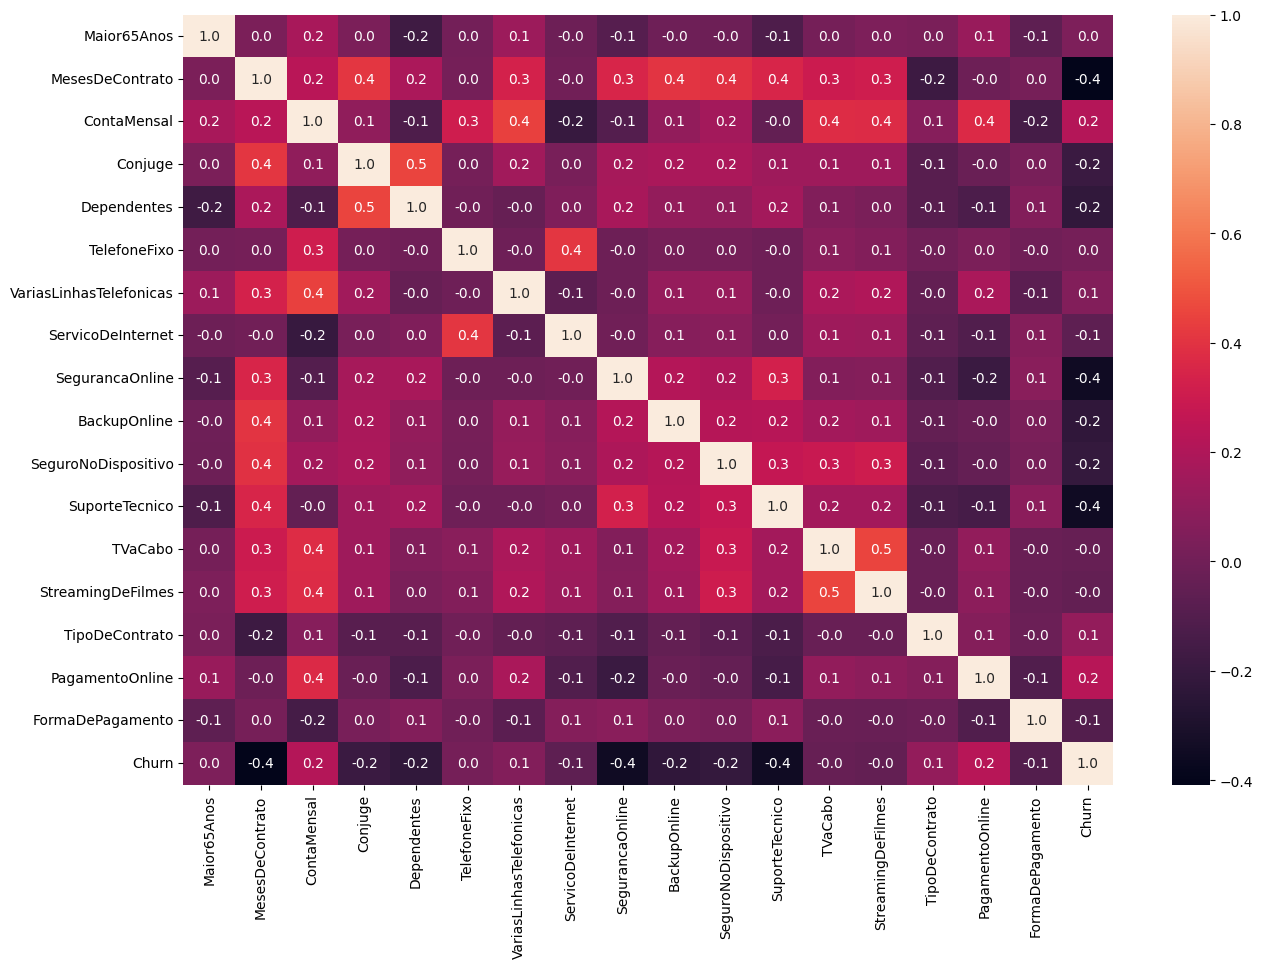

In [27]:
#verificando colunas com alta correlacao

corr = dados.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, fmt = ".1f")
# Não existem colunas com correlação relevante

In [37]:
from sklearn.feature_selection import RFE
from numpy import random

selecionador_rfe = RFE(estimator = classificador,step = 1,  n_features_to_select = 6)
selecionador_rfe.fit(x_treino, y_treino)

treino_rfe = selecionador_rfe.transform(x_treino)
teste_rfe = selecionador_rfe.transform(x_teste)

classificador.fit(treino_rfe, y_treino)

RandomForestClassifier(n_estimators=50, random_state=36)

In [38]:
df_RFE_results = []
for i in range(x.shape[1]):
    df_RFE_results.append(
        {      
            'Feature_names': list(x.columns)[i],
            'Selected':  selecionador_rfe.support_[i],
            'RFE_ranking':  selecionador_rfe.ranking_[i],
        }
    )

df_RFE_results = pd.DataFrame(df_RFE_results)
df_RFE_results.index.name='Columns'
colunas_mantidas = list(df_RFE_results[df_RFE_results['Selected'] == True].Feature_names)

x_otimizado = x[colunas_mantidas]

In [39]:
from numpy import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

SEED= 5
random.seed(SEED)

x = x_otimizado
y = y

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify = y)


classificador = RandomForestClassifier(n_estimators = 100, random_state = 36)
classificador.fit(x_treino, y_treino)
classificador.score(x_teste, y_teste) * 100

83.37843061461152